# Indicators of heavy traffic westbound on I-94 highway

**The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, seasonal etc.**

In [142]:
import pandas as pd
import numpy as np
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv') #read our traffic data into pandas

In [99]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

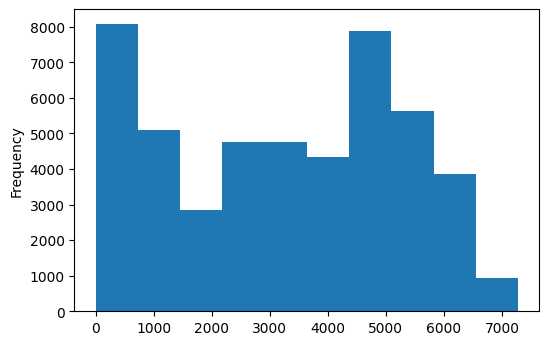

In [101]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [102]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**From the above analysis we observed the following**
* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night
* About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.
  We'll start by dividing the dataset into two parts:
  
  * Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
  * Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)
  

In [103]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [104]:
day_time = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]

In [105]:
night_time = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

In [106]:
day_time.shape

(23877, 9)

In [107]:
night_time.shape

(24327, 9)

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline

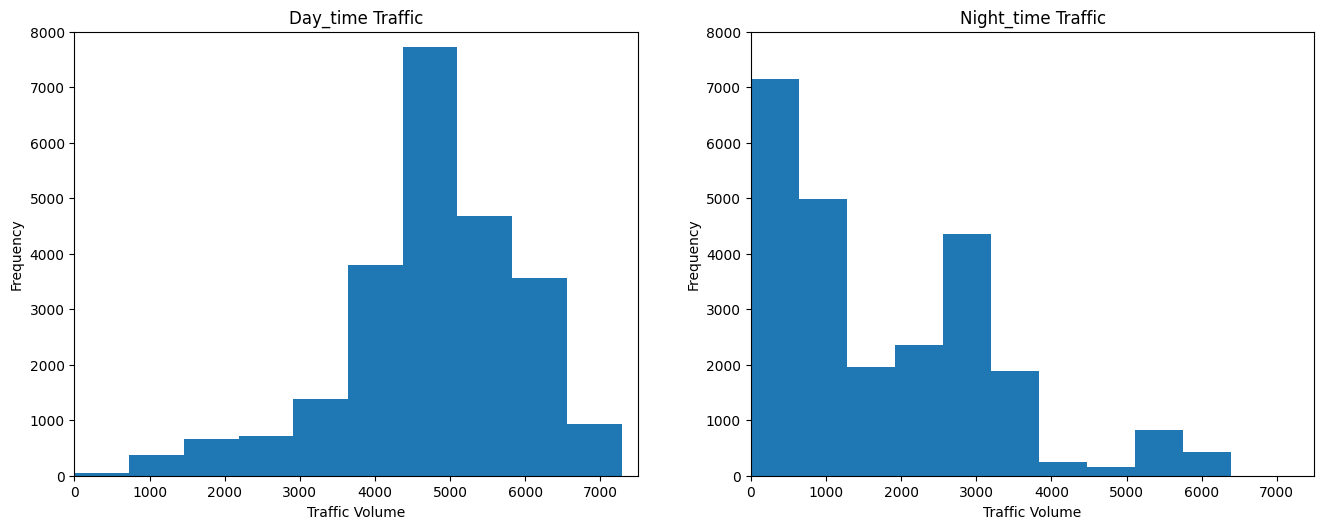

In [109]:
plt.figure(figsize = (16, 20))
plt.subplot(3,2,1)
plt.title('Day_time Traffic')
plt.xlabel('Traffic Volume')
plt.xlim(-1,7500)
plt.ylim(0,8000)
day_time['traffic_volume'].plot.hist()
plt.subplot(3,2,2)
plt.title('Night_time Traffic')
plt.xlabel('Traffic Volume')
plt.xlim(-1,7500)
plt.ylim(0,8000)
night_time['traffic_volume'].plot.hist()
plt.show()

In [110]:
day_time['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [111]:
night_time['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the above analysis, we can see the traffic volumes are higher in the daytime with 75% of the traffic volume at 5559, and 75% of the night time at 2819.
Therefor we will focus on the daytime dataframe since our Focus is to find indicators of heavy traffic

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the week
* Time of the day

* **(1). By month**

In [112]:
day_time['month'] = day_time.copy()['date_time'].dt.month

<ipython-input-112-4ee235243d47>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
by_month = day_time.copy().pivot_table(values = 'traffic_volume',index = 'month', aggfunc = np.mean)

In [114]:
by_month

,traffic_volume
month,
1,4495.613727
2,4711.198394
3,4889.409560
4,4906.894305
5,4911.121609
6,4898.019566
7,4595.035744
8,4928.302035
9,4870.783145


In [115]:
by_month.shape

(12, 1)

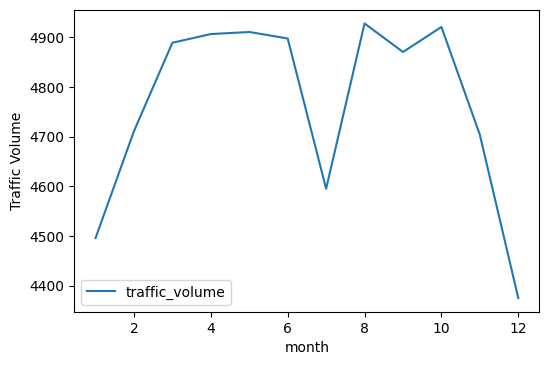

In [116]:
by_month.plot()
plt.ylabel('Traffic Volume')
plt.show()

**Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction.**

* **(2). By day of week**

In [117]:
day_time['dayofweek'] = day_time['date_time'].copy().dt.dayofweek
by_dayofweek = day_time.pivot_table(values = 'traffic_volume', index = 'dayofweek', aggfunc = np.mean)
by_dayofweek

<ipython-input-117-3104d16febc8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,traffic_volume
dayofweek,
0,4893.551286
1,5189.004782
2,5284.454282
3,5311.303730
4,5291.600829
5,3927.249558
6,3436.541789


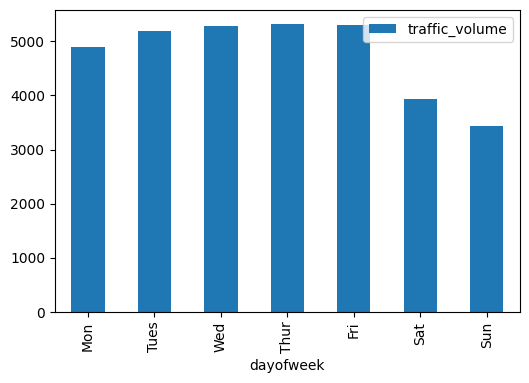

In [118]:
by_dayofweek.plot.bar()
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun'])
plt.show()

From the plot, we can tell the tratfic volume was higher from monday to friday and lower over the weekends 

**Lets go a step further to visualize the average taffic volume for weekdays vs weekends**

* Average traffic volume for weekdays

In [119]:
avg_vol_wkday= by_dayofweek.iloc[0:5].sum() / len(by_dayofweek.iloc[0:5])

In [120]:
avg_vol_wkday

traffic_volume    5193.982982
dtype: float64

In [121]:
type(avg_vol_wkday)

pandas.core.series.Series

**Average traffic volume for weekdends**

In [122]:
avg_vol_weekend = by_dayofweek.iloc[5:].sum() / len(by_dayofweek.iloc[5:])

In [123]:
print(avg_vol_weekend)

traffic_volume    3681.895674
dtype: float64


In [124]:
avg_vol_weekend.values

array([3681.89567367])

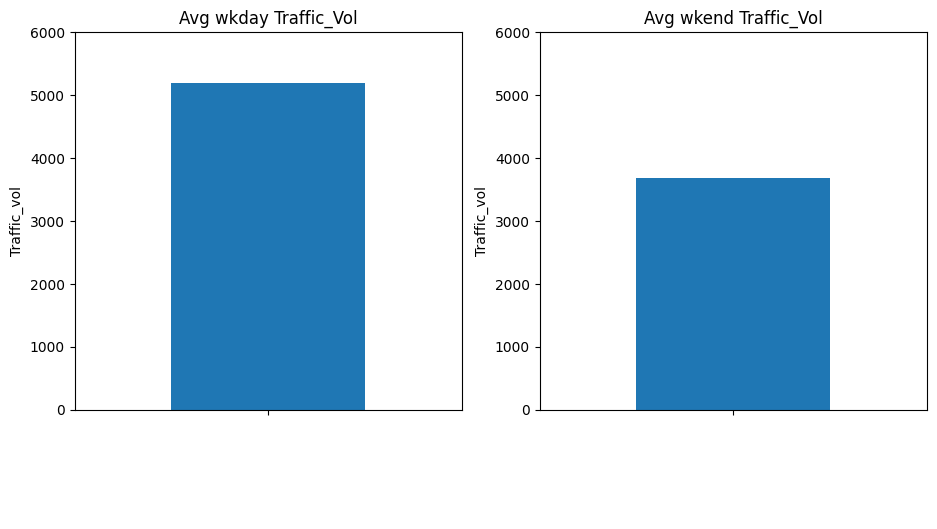

In [125]:
plt.figure(figsize = [11,5])
plt.subplot(1,2,1)
plt.ylim(0,6000)
plt.title('Avg wkday Traffic_Vol')
plt.ylabel('Traffic_vol')
plt.xticks(color='w')# To remove the xaxis label
avg_vol_wkday.plot.bar()
plt.subplot(1,2,2)
plt.ylim(0,6000)
plt.title('Avg wkend Traffic_Vol')
plt.ylabel('Traffic_vol')
plt.xticks(color='w')# To remove the xaxis label
avg_vol_weekend.plot.bar()
plt.show()

**from the above analysis, the average traffic volume for weekdays is 5194 and for weekends is 3682, so we will focus on weekdays going forward, but first we will take a look at the average hour traffic volume of weekdays and weekends to see how they change**

* **By Time of the day**

In [126]:
day_time['hour'] = day_time['date_time'].copy().dt.hour

<ipython-input-126-88df73cc4e45>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**we will most likely be dealing with rows from the business days since the average traffic volume is higher on those days.**

In [127]:
business_days = day_time.copy()[day_time['dayofweek']<= 4] #4== Friday

In [128]:
weekend_days = day_time.copy()[day_time['dayofweek']>= 5]

In [129]:
business_days

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,9,4,14
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,9,4,15
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,9,4,16
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,9,4,17


In [130]:
by_hr_business_days = business_days.pivot_table(index = 'hour', values = 'traffic_volume', aggfunc = np.mean)

In [131]:
by_hr_weekend_days = weekend_days.pivot_table(index = 'hour', values = 'traffic_volume', aggfunc = np.mean)

In [132]:
by_hour_business_days

,traffic_volume
hour,
7,6030.413559
8,5503.497970
9,4895.269257
10,4378.419118
11,4633.419470
12,4855.382143
13,4859.180473
14,5152.995778
15,5592.897768


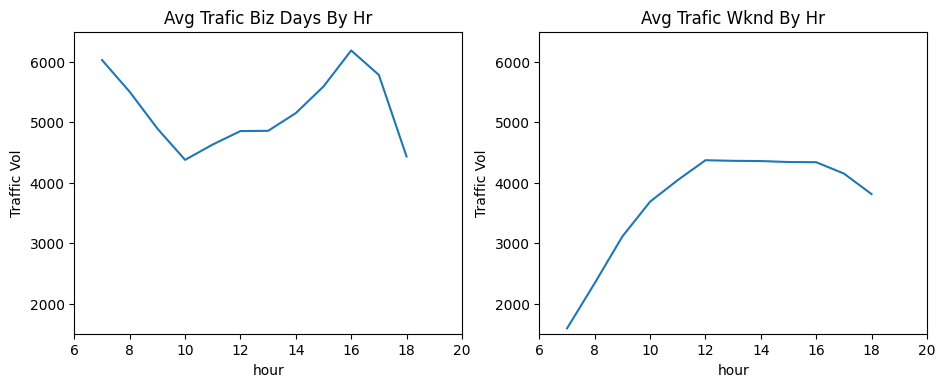

In [133]:
plt.figure(figsize = (11,4))
plt.subplot(1,2,1)
plt.title('Avg Trafic Biz Days By Hr')
plt.ylabel('Traffic Vol')
plt.xlabel('Hour')
plt.xlim(6,20)
plt.ylim(1500,6500)
by_hour_business_days['traffic_volume'].plot.line()
plt.subplot(1,2,2)
plt.title('Avg Trafic Wknd By Hr')
plt.ylabel('Traffic Vol')
plt.xlabel('Hour')
plt.ylim((0, 6500))
plt.xlim(6,20)
plt.ylim(1500,6500)
by_weekend_days['traffic_volume'].plot.line()
plt.show()

**Haven analysed different time indicators for heavy traffic volume, we arrived at the following.**
* By month
Traffic is usually heavier in the warm months (Mar-Oct)
* By weekday
The traffic volume on the avg is heavier on Business days than on weekends
* By hour
on Business days, the traffic is higher atound 7.am & 16.00pm

In [134]:
business_days.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [135]:
weather_corr = business_days.corr()['traffic_volume']

In [136]:
weather_corr

temp              0.139999
rain_1h           0.002728
snow_1h          -0.008016
clouds_all       -0.081708
traffic_volume    1.000000
month            -0.030233
dayofweek         0.148035
hour              0.014579
Name: traffic_volume, dtype: float64

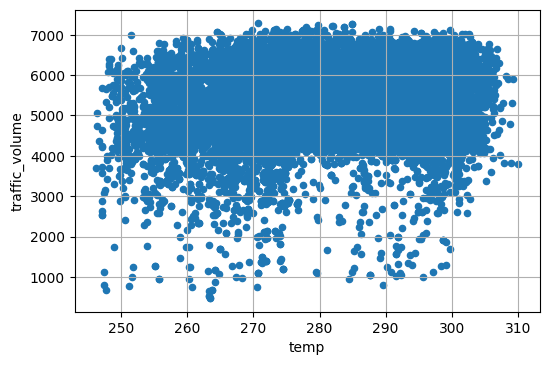

In [137]:
business_days.plot.scatter('temp', 'traffic_volume')
plt.grid()
plt.show()

from the plot above, there's no correlation between traffic volume and any of the numeric weather columns, to see if we can find any further indicator, we will look into cathegorical weather columns (weather_main and weather_description)

In [138]:
by_weather_main = business_days.pivot_table(index = 'weather_main', values = 'traffic_volume',aggfunc = np.mean)
by_weather_desc = business_days.pivot_table(index = 'weather_description', values = 'traffic_volume',aggfunc = np.mean)

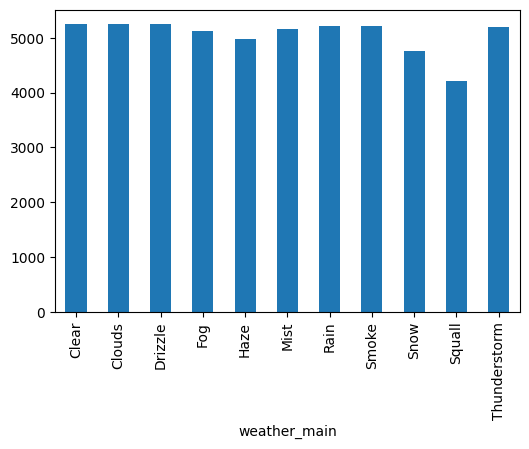

In [139]:
by_weather_main['traffic_volume'].plot.bar()
plt.show()

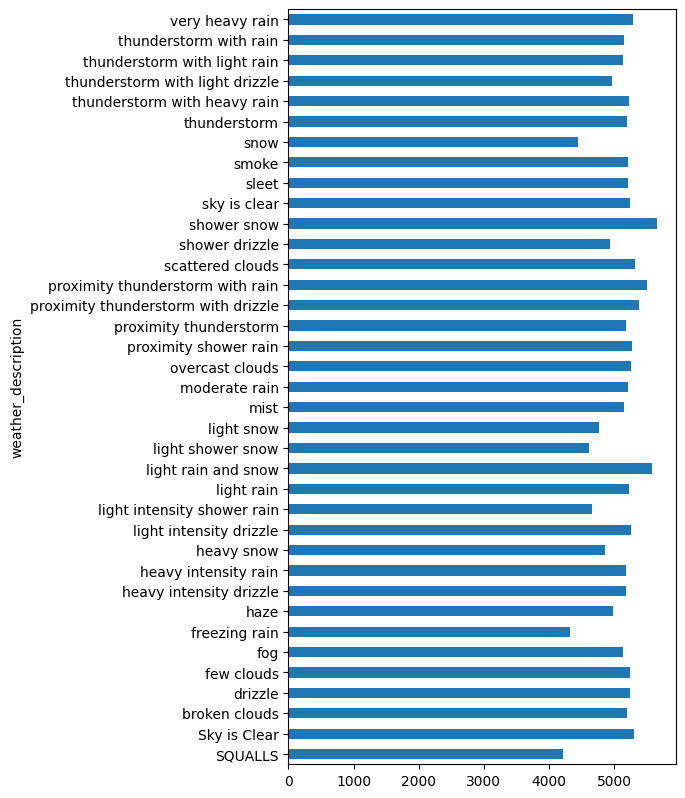

In [140]:
plt.figure(figsize = [5,10])
by_weather_desc['traffic_volume'].plot.barh()
plt.show()

# Conclusion

**in addition to the time indicators already mention earlier like;**  
* The rush hours on business days
* warm months

**The following weather conditions usually result in an increase in traffic volume.**

* Shower snow
* Light rain and snow
* Proximity thunderstorm and drizzle